<a href="https://colab.research.google.com/github/matheo-angelo/IC/blob/main/ABIDE_Exemplo_fMRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exemplo de fMRI

Aqui, o objetivo é entender como funciona o pipeline de dados do exame para uma única amostra, desde o arquivo do exame de fMRI até a construção do grafo.

In [1]:
def is_colab():
    try:
        import google.colab
        return True
    except ImportError:
        return False

In [2]:
def get_data_path():
    if is_colab():
        return '/content/drive/MyDrive/IC/ABIDE I/fmri_CMU_A_ABIDE_0050642.nii.gz'
    else:
        return 'project_data/fmri_CMU_A_ABIDE_0050642.nii.gz'


In [3]:
def install_requirements_if_colab():
  if is_colab():
    !pip install git+https://github.com/matheo-angelo/IC/blob/main/requirements.txt
    !pip install -r requirements.txt

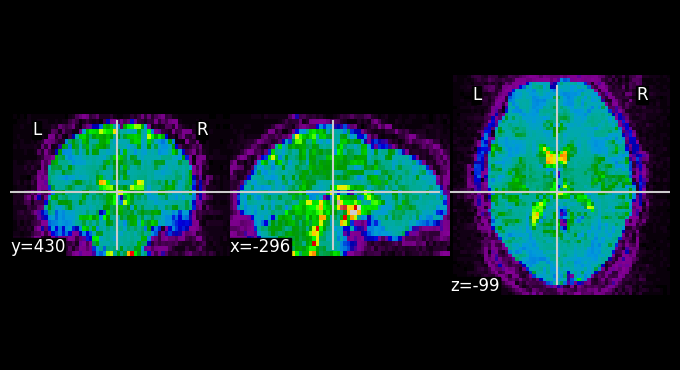

In [10]:
install_requirements_if_colab()

from nilearn import image, plotting
import nibabel as nib

img = nib.load(get_data_path())
exame = img.get_fdata()

# Seleciona o primeiro tempo
first_timepoint = exame[:, :, :, 0]  # O primeiro tempo

# Cria uma nova imagem NIfTI a partir do primeiro tempo
first_timepoint_img = nib.Nifti1Image(first_timepoint, img.affine)

# Plota a imagem
plotting.plot_epi(first_timepoint_img)
plotting.show()

In [12]:
print(exame.shape)
print(first_timepoint_img.shape)

(64, 64, 28, 240)
(64, 64, 28)
